In [1]:
# Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. DỮ LIỆU - TIỀN XỬ LÝ

## 1.1 Ngày Lễ (Holiday)

In [2]:
# Đọc dữ liệu từ file CSV về ngày lễ
holidays_df = pd.read_csv('holidays.csv')
holidays_df['date'] = pd.to_datetime(holidays_df['date'], errors='coerce')

# Hiển thị thông tin 5 dòng đầu tiên của holidays_df
holidays_df.head()

,date,holiday
0,2021-01-01,New Year
1,2021-01-07,Orthodox Christmas
2,2021-01-13,Old New Year
3,2021-01-19,Baptizing - Sacred Epiphany
4,2021-01-25,Students day


## 1.2 CHI TIẾT CHIẾN DỊCH (CAMPAIGNS DETAILS)

In [3]:
# Đọc dữ liệu từ file CSV về chiến dịch
campaigns_df = pd.read_csv('campaigns.csv')

In [4]:
# Chuyển đổi các cột thành các kiểu dữ liệu tương ứng
campaigns_df['id']                            = campaigns_df['id'].astype('int64')
campaigns_df['campaign_type']                 = campaigns_df['campaign_type'].astype('category')
campaigns_df['channel']                       = campaigns_df['channel'].astype('category')
campaigns_df['topic']                         = campaigns_df['topic'].astype('category')
campaigns_df['started_at']                    = pd.to_datetime(campaigns_df['started_at'], errors='coerce')
campaigns_df['finished_at']                   = pd.to_datetime(campaigns_df['finished_at'], errors='coerce')
campaigns_df['total_count']                   = campaigns_df['total_count'].astype('Int64')
campaigns_df['ab_test']                       = campaigns_df['ab_test'].astype('bool')
campaigns_df['warmup_mode']                   = campaigns_df['warmup_mode'].astype('bool')
campaigns_df['hour_limit']                    = campaigns_df['hour_limit'].astype('Int64')
campaigns_df['subject_length']                = campaigns_df['subject_length'].astype('Int64')
campaigns_df['subject_with_personalization']  = campaigns_df['subject_with_personalization'].astype('bool')
campaigns_df['subject_with_deadline']         = campaigns_df['subject_with_deadline'].astype('bool')
campaigns_df['subject_with_emoji']            = campaigns_df['subject_with_emoji'].astype('bool')
campaigns_df['subject_with_bonuses']          = campaigns_df['subject_with_bonuses'].astype('bool')
campaigns_df['subject_with_discount']         = campaigns_df['subject_with_discount'].astype('bool')
campaigns_df['subject_with_saleout']          = campaigns_df['subject_with_saleout'].astype('bool')
campaigns_df['is_test']                       = campaigns_df['is_test'].astype('bool')
campaigns_df['position']                      = campaigns_df['position'].astype('Int64')

# Hiển thị thông tin 5 dòng đầu tiên của campaigns_df
campaigns_df.head()

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503,True,False,<NA>,109,False,True,True,False,False,False,True,<NA>


In [5]:
# Hiển thị thông tin về các cột trong campaigns_df
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            1907 non-null   int64         
 1   campaign_type                 1907 non-null   category      
 2   channel                       1907 non-null   category      
 3   topic                         1877 non-null   category      
 4   started_at                    1824 non-null   datetime64[ns]
 5   finished_at                   1808 non-null   datetime64[ns]
 6   total_count                   1824 non-null   Int64         
 7   ab_test                       1907 non-null   bool          
 8   warmup_mode                   1907 non-null   bool          
 9   hour_limit                    31 non-null     Int64         
 10  subject_length                1880 non-null   Int64         
 11  subject_with_personalization  

Loại bỏ các trường không có ý nghĩa nhiều

In [6]:
# Xóa các cột không cần thiết trong campaigns_df
campaigns_df = campaigns_df.drop(['warmup_mode', 'hour_limit','is_test','ab_test','position'], axis=1, errors='ignore')

In [7]:
# Hiển thị dữ liệu sau khi xóa các cột
campaigns_df

,id,campaign_type,channel,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211,146,False,False,True,False,False,False
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337,97,False,False,True,False,False,False
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080,146,False,False,True,False,False,False
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838,97,False,False,True,False,False,False
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503,109,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,179,transactional,email,profile updated,NaT,NaT,<NA>,134,False,False,False,False,False,False
1903,35,transactional,email,order reminder,NaT,NaT,<NA>,88,False,False,False,False,False,False
1904,57,transactional,email,order reminder,NaT,NaT,<NA>,88,False,False,False,False,False,False
1905,56,transactional,email,order reminder,NaT,NaT,<NA>,88,False,False,False,False,False,False


### 1.3 TIN NHẮN (MESSAGE)

In [8]:
# Đọc dữ liệu tin nhắn từ file CSV về tin nhắn
messages_df = pd.read_csv('messages-demo.csv', index_col='message_id', low_memory=False)

In [9]:
# Xóa các cột không cần thiết trong messages_df
messages_df.drop(labels=['id', 'created_at', 'updated_at', 'category'], inplace=True, axis=1)

# Chuyển đổi kiểu dữ liệu của các cột trong messages_df
messages_df['campaign_id'] = messages_df['campaign_id'].astype('Int64')
messages_df['client_id'] = messages_df['client_id'].astype('Int64')

# Hàm chuyển đổi chuỗi 't' và 'f' thành True/False
def convert_to_bool(value):
    if value == 't':
        return True
    else:
        return False

# Áp dụng hàm chuyển đổi cho các cột có giá trị 't'/'f'
messages_df['is_opened']       = messages_df['is_opened'].apply(convert_to_bool)
messages_df['is_clicked']      = messages_df['is_clicked'].apply(convert_to_bool)
messages_df['is_unsubscribed'] = messages_df['is_unsubscribed'].apply(convert_to_bool)
messages_df['is_hard_bounced'] = messages_df['is_hard_bounced'].apply(convert_to_bool)
messages_df['is_soft_bounced'] = messages_df['is_soft_bounced'].apply(convert_to_bool)
messages_df['is_complained']   = messages_df['is_complained'].apply(convert_to_bool)
messages_df['is_blocked']      = messages_df['is_blocked'].apply(convert_to_bool)
messages_df['is_purchased']    = messages_df['is_purchased'].apply(convert_to_bool)

# Chuyển các cột thời gian sang kiểu datetime
messages_df['date']                  = pd.to_datetime(messages_df['date'])
messages_df['sent_at']               = pd.to_datetime(messages_df['sent_at'])
messages_df['opened_first_time_at']  = pd.to_datetime(messages_df['opened_first_time_at'])
messages_df['opened_last_time_at']   = pd.to_datetime(messages_df['opened_last_time_at'])
messages_df['clicked_first_time_at'] = pd.to_datetime(messages_df['clicked_first_time_at'])
messages_df['clicked_last_time_at']  = pd.to_datetime(messages_df['clicked_last_time_at'])
messages_df['unsubscribed_at']       = pd.to_datetime(messages_df['unsubscribed_at'])
messages_df['hard_bounced_at']       = pd.to_datetime(messages_df['hard_bounced_at'])
messages_df['soft_bounced_at']       = pd.to_datetime(messages_df['soft_bounced_at'])
messages_df['complained_at']         = pd.to_datetime(messages_df['complained_at'])
messages_df['blocked_at']            = pd.to_datetime(messages_df['blocked_at'])
messages_df['purchased_at']          = pd.to_datetime(messages_df['purchased_at'])

# Hiển thị 5 dòng đầu tiên của messages_df
messages_df.head(5)

,campaign_id,message_type,client_id,channel,platform,email_provider,stream,date,sent_at,is_opened,...,is_hard_bounced,hard_bounced_at,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at
message_id,,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,mail.ru,desktop,2021-04-30,2021-04-30 11:27:43,True,...,False,NaT,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38
0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,yandex.ru,desktop,2021-04-30,2021-04-30 08:00:35,True,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT
276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:56:37,True,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT
4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:53:59,True,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT
5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,mail.ru,desktop,2021-04-30,2021-04-30 06:20:37,True,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT


Tất cả các tin nhắn trong chiến dịch có thể được phân loại theo ba loại chiến dịch chính: chiến dịch hàng loạt, tin nhắn kích hoạt, và tin nhắn giao dịch.

- Chiến dịch hàng loạt được gửi vào các thời điểm đặc biệt như trước các kỳ nghỉ hoặc khi cần thúc đẩy doanh số, cũng như thu hút lại khách hàng tiềm năng.

- Tin nhắn kích hoạt được gửi tự động và dựa trên hành vi người dùng, như giỏ hàng bỏ quên. Sự gia tăng số lượng người dùng truy cập vào website/app sẽ dẫn đến việc gửi nhiều tin nhắn kích hoạt hơn.

- Tin nhắn giao dịch chủ yếu dùng để thông báo các thay đổi trong quá trình giao dịch như việc thêm thưởng, thay đổi trạng thái giao hàng đơn hàng, v.v.

Mỗi loại chiến dịch sẽ có đặc điểm và thời gian gửi khác nhau, phù hợp với mục tiêu và hành vi của người dùng.

C:\Users\miynzi\AppData\Local\Temp\ipykernel_9784\1847483124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_distribution.index, y=channel_distribution.values, palette='viridis')


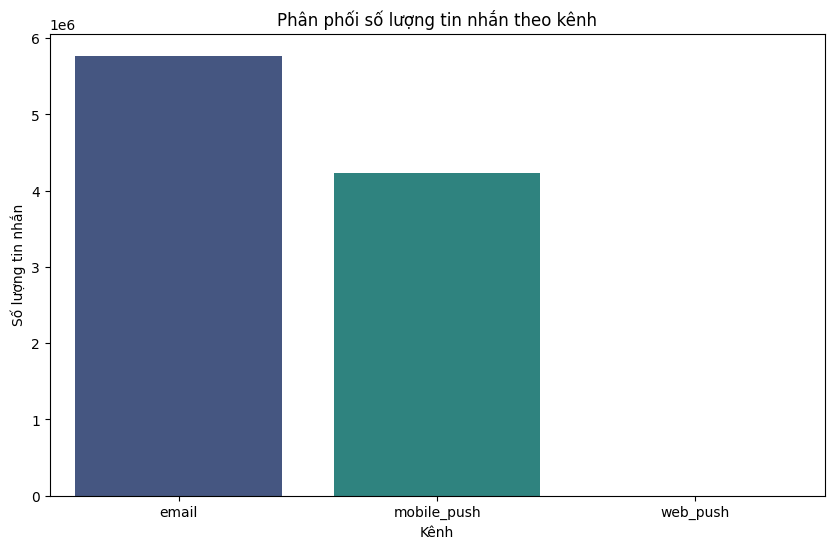

In [10]:
# Biểu đồ phân phối số lượng tin nhắn theo kênh
channel_distribution = messages_df['channel'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_distribution.index, y=channel_distribution.values, palette='viridis')
plt.title('Phân phối số lượng tin nhắn theo kênh')
plt.xlabel('Kênh')
plt.ylabel('Số lượng tin nhắn')
plt.show()

- Email: Kênh có số lượng tin nhắn lớn nhất, thể hiện tính ổn định và khả năng tiếp cận cao.
- Mobile Push: Đứng thứ hai, cho thấy xu hướng tăng trưởng trong việc tiếp cận qua thiết bị di động.
- Web Push: Số lượng tin nhắn thấp nhất, ít phổ biến hơn và phù hợp với các trường hợp cụ thể.

Ý nghĩa: Biểu đồ giúp xác định các kênh hiệu quả nhất, hỗ trợ phân bổ nguồn lực chiến lược.

C:\Users\miynzi\AppData\Local\Temp\ipykernel_9784\1502018439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_distribution.index, y=platform_distribution.values, palette='viridis')


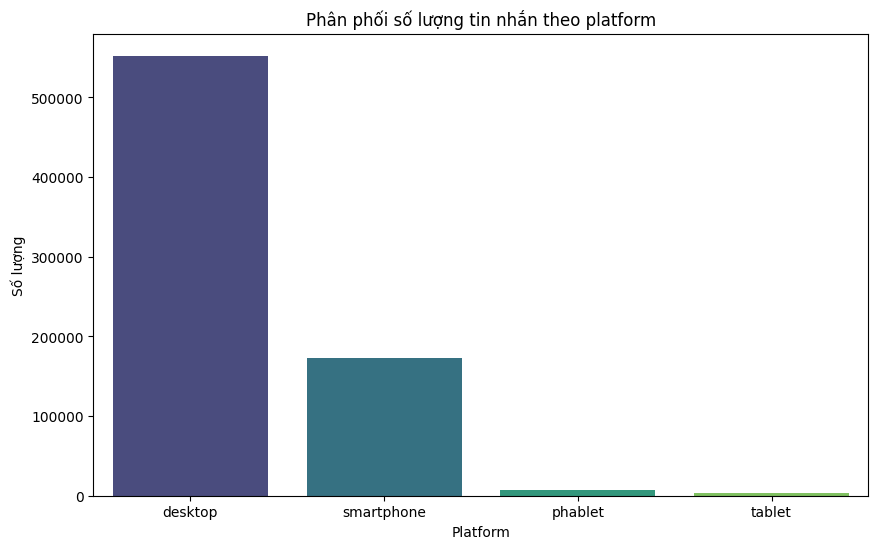

In [11]:
# Biểu đồ phân phối số lượng tin nhắn theo platform
platform_distribution = messages_df['platform'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_distribution.index, y=platform_distribution.values, palette='viridis')
plt.title('Phân phối số lượng tin nhắn theo platform')
plt.xlabel('Platform')
plt.ylabel('Số lượng')
plt.show()

- Desktop: Nền tảng có số lượng tin nhắn lớn nhất, chủ yếu được sử dụng do tính ổn định và năng suất cao.
- Smartphone: Đứng thứ hai với số lượng tin nhắn khá lớn, phản ánh xu hướng tăng trong việc sử dụng thiết bị di động.
- Phablet và Tablet: Số lượng tin nhắn rất thấp, ít được sử dụng và không phải lựa chọn ưu tiên.

Ý nghĩa: Biểu đồ cung cấp thông tin quan trọng để tối ưu hóa chiến lược giao tiếp dựa trên nền tảng phổ biến và hiệu quả nhất.

Do là chỉ 1 có 1 loại -> không có ý nghĩa cho việc phân tích -> drop stream

In [12]:
# Kiểm tra và loại bỏ cột 'stream' khỏi messages_df
stream_distribution = messages_df['stream'].value_counts()
stream_distribution

stream
desktop    10000000
Name: count, dtype: int64

In [13]:
messages_df = messages_df.drop(['stream'], axis =1)
messages_df.head(3)

,campaign_id,message_type,client_id,channel,platform,email_provider,date,sent_at,is_opened,opened_first_time_at,...,is_hard_bounced,hard_bounced_at,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at
message_id,,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,mail.ru,2021-04-30,2021-04-30 11:27:43,True,2021-05-04 05:47:05,...,False,NaT,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38
0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,yandex.ru,2021-04-30,2021-04-30 08:00:35,True,2021-05-04 15:38:20,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT
276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,mail.ru,2021-04-30,2021-04-30 05:56:37,True,2021-05-04 15:16:32,...,False,NaT,False,NaT,False,NaT,False,NaT,False,NaT


C:\Users\miynzi\AppData\Local\Temp\ipykernel_9784\116123943.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=channel_distribution.index, y=channel_distribution.values, palette='Blues')
C:\Users\miynzi\AppData\Local\Temp\ipykernel_9784\116123943.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=channel_distribution_percentage.index, y=channel_distribution_percentage.values, palette='Blues')
C:\Users\miynzi\AppData\Local\Temp\ipykernel_9784\116123943.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=channel_di

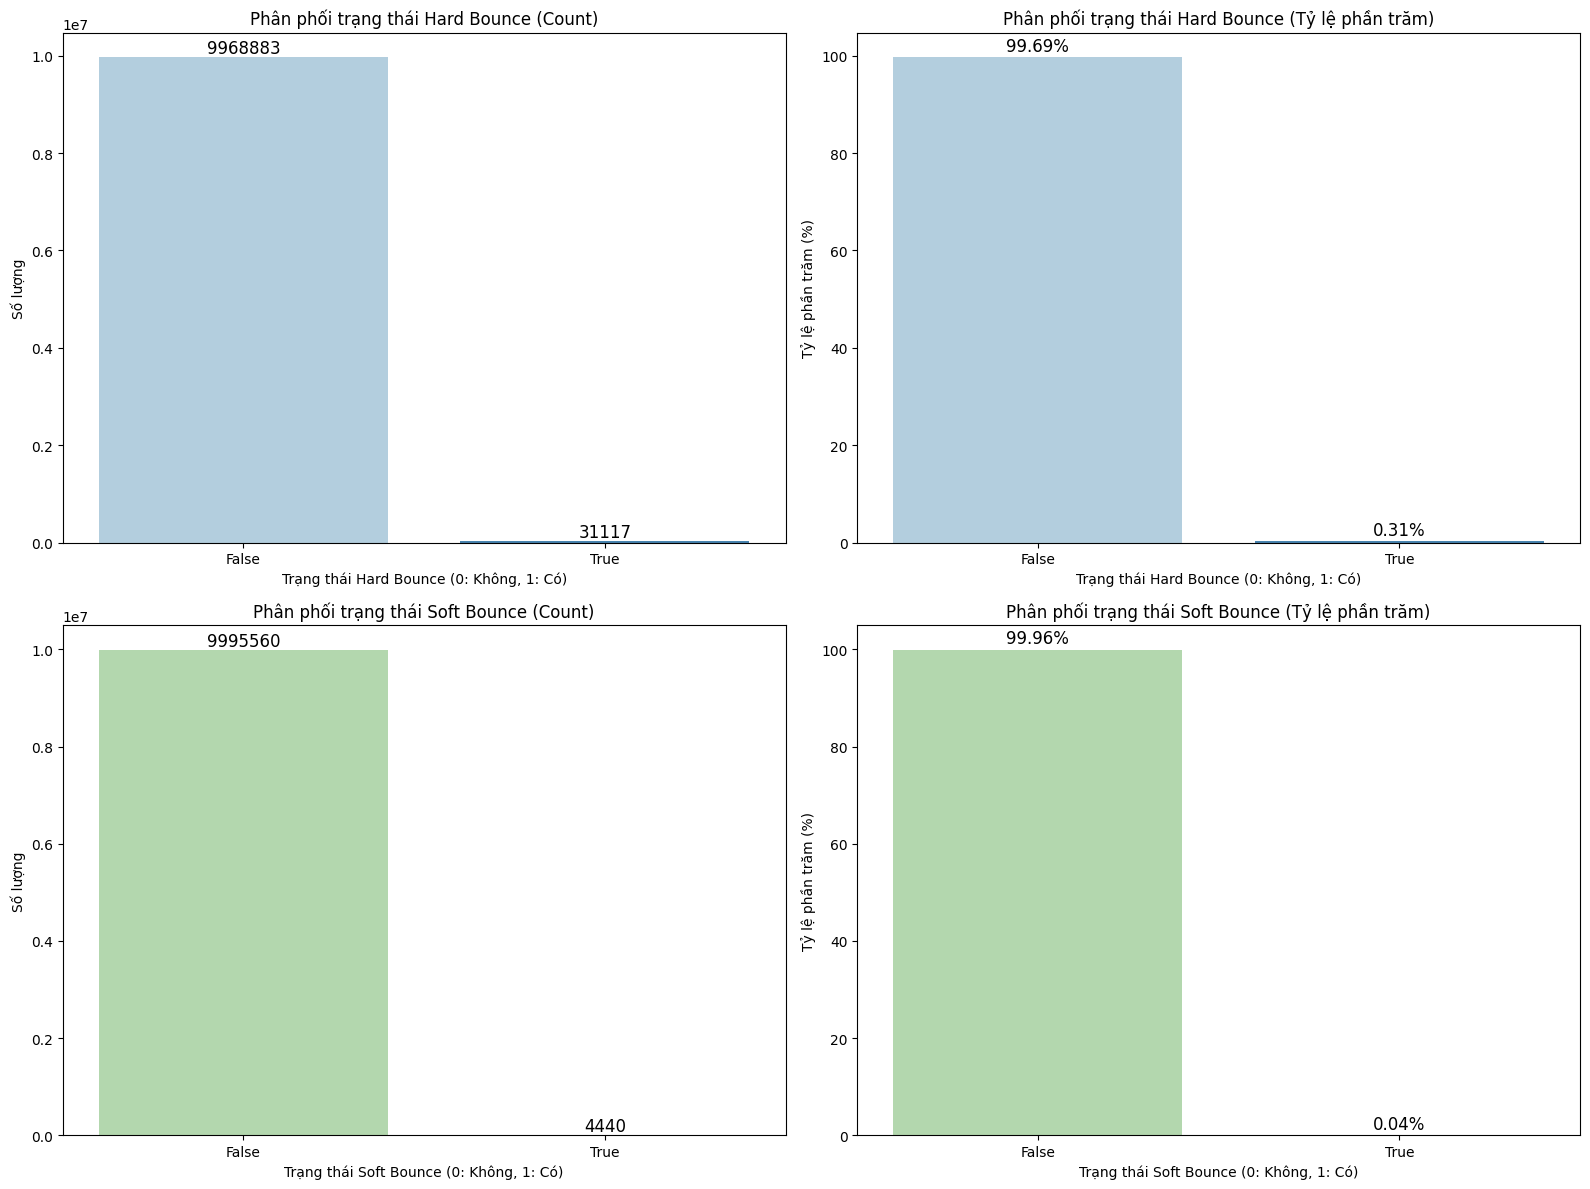

In [14]:
# Biểu đồ phân phối trạng thái 'is_hard_bounced' và 'is_soft_bounced'
# Phân tích và vẽ các biểu đồ phân phối của trạng thái Hard Bounce và Soft Bounce

# Phân phối trạng thái Hard Bounce (Count)
channel_distribution = messages_df['is_hard_bounced'].value_counts()
channel_distribution_percentage = messages_df['is_hard_bounced'].value_counts(normalize=True) * 100

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
ax1 = sns.barplot(x=channel_distribution.index, y=channel_distribution.values, palette='Blues')
plt.title('Phân phối trạng thái Hard Bounce (Count)')
plt.xlabel('Trạng thái Hard Bounce (0: Không, 1: Có)')
plt.ylabel('Số lượng')
for i, value in enumerate(channel_distribution.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Phân phối trạng thái Hard Bounce (Tỷ lệ phần trăm)
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x=channel_distribution_percentage.index, y=channel_distribution_percentage.values, palette='Blues')
plt.title('Phân phối trạng thái Hard Bounce (Tỷ lệ phần trăm)')
plt.xlabel('Trạng thái Hard Bounce (0: Không, 1: Có)')
plt.ylabel('Tỷ lệ phần trăm (%)')
for i, value in enumerate(channel_distribution_percentage.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Phân phối trạng thái Soft Bounce (Count)
channel_distribution2 = messages_df['is_soft_bounced'].value_counts()
channel_distribution2_percentage = messages_df['is_soft_bounced'].value_counts(normalize=True) * 100

plt.subplot(2, 2, 3)
ax3 = sns.barplot(x=channel_distribution2.index, y=channel_distribution2.values, palette='Greens')
plt.title('Phân phối trạng thái Soft Bounce (Count)')
plt.xlabel('Trạng thái Soft Bounce (0: Không, 1: Có)')
plt.ylabel('Số lượng')
for i, value in enumerate(channel_distribution2.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Phân phối trạng thái Soft Bounce (Tỷ lệ phần trăm)
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x=channel_distribution2_percentage.index, y=channel_distribution2_percentage.values, palette='Greens')
plt.title('Phân phối trạng thái Soft Bounce (Tỷ lệ phần trăm)')
plt.xlabel('Trạng thái Soft Bounce (0: Không, 1: Có)')
plt.ylabel('Tỷ lệ phần trăm (%)')
for i, value in enumerate(channel_distribution2_percentage.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

Hard Bounce:
- Số lượng: 99.69% không bị trả lại, chỉ 0.31% bị trả lại.
- Kết luận: Tỷ lệ bị trả lại rất thấp, chủ yếu tin nhắn được gửi thành công.

Soft Bounce:
- Số lượng: 99.96% không bị trả lại, chỉ 0.04% bị trả lại.
- Kết luận: Tỷ lệ bị trả lại mềm gần như không đáng kể.

Cả hai trạng thái cho thấy hệ thống gửi tin hoạt động hiệu quả, đảm bảo phân phối tin nhắn với chất lượng cao.

In [15]:
# Lọc bỏ các bản ghi có 'is_hard_bounced' = True
messages_df[messages_df['is_hard_bounced'] == True].head(3)

messages_df = messages_df[messages_df['is_hard_bounced'] == False]

# Xóa các cột không cần thiết liên quan đến trạng thái Hard Bounce
messages_df = messages_df.drop(columns=['is_hard_bounced','hard_bounced_at'])

# Lọc bỏ các bản ghi có 'is_soft_bounced' = True
messages_df = messages_df[messages_df['is_soft_bounced'] == False]

# Xóa các cột không cần thiết liên quan đến trạng thái Soft Bounce
messages_df = messages_df.drop(columns=['is_soft_bounced','soft_bounced_at'])

# Hiển thị 3 dòng đầu tiên của dữ liệu sau khi xử lý
messages_df.head(3)

,campaign_id,message_type,client_id,channel,platform,email_provider,date,sent_at,is_opened,opened_first_time_at,...,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at
message_id,,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,mail.ru,2021-04-30,2021-04-30 11:27:43,True,2021-05-04 05:47:05,...,2021-05-04 05:47:46,2021-05-04 05:47:46,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38
0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,yandex.ru,2021-04-30,2021-04-30 08:00:35,True,2021-05-04 15:38:20,...,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT
276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,mail.ru,2021-04-30,2021-04-30 05:56:37,True,2021-05-04 15:16:32,...,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT


Nếu các cột **'hard bound'** và **'soft bound'** đều có giá trị True, điều này đồng nghĩa với việc tin nhắn không đến tay người dùng, và số lượng các trường hợp này rất nhỏ, không đáng kể và các thông tin khác đều null.

Do đó, chúng ta sẽ loại bỏ các hàng mà cả hai cột này đều có giá trị True và xoá luôn hai cột này.

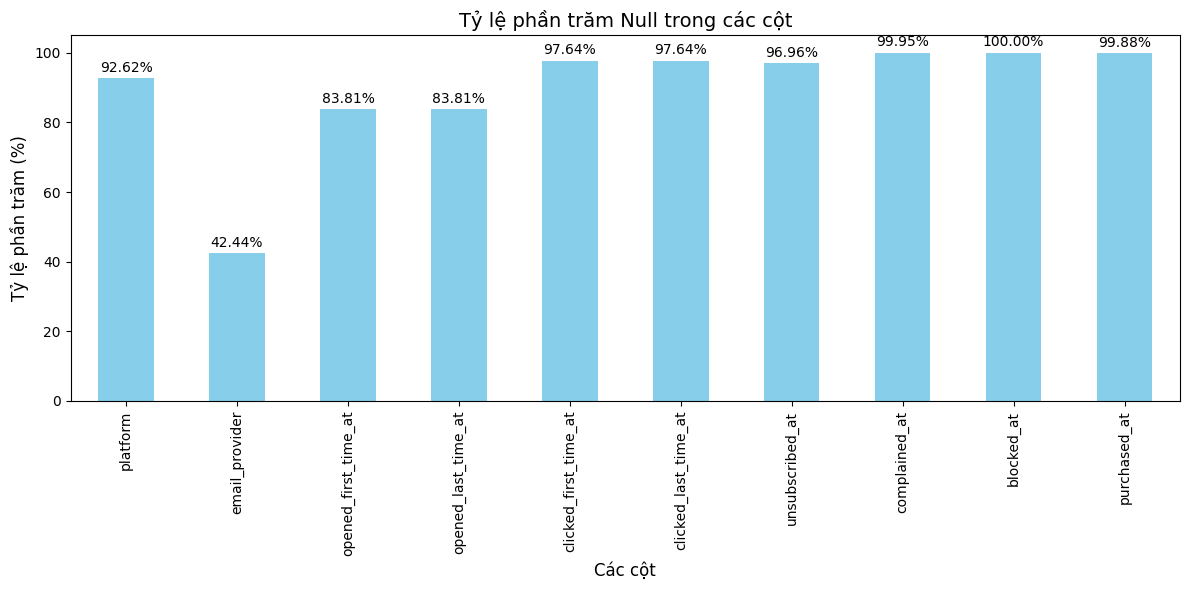

In [16]:
# Tính tỷ lệ phần trăm Null trong các cột và vẽ biểu đồ
null_percentage = messages_df.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]

plt.figure(figsize=(12, 6))
ax = null_percentage.plot(kind='bar', color='skyblue')
for i, v in enumerate(null_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Tỷ lệ phần trăm Null trong các cột', fontsize=14)
plt.xlabel('Các cột', fontsize=12)
plt.ylabel('Tỷ lệ phần trăm (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Các cột có tỷ lệ Null cao:

- platform (92.62%), opened_ và clicked_ (trên 83%), blocked_at (100%).
- Những cột này thiếu dữ liệu nghiêm trọng, có thể cân nhắc loại bỏ nếu không quan trọng.

Các cột có tỷ lệ Null trung bình:
- email_provider (42.44%). Có thể xử lý bằng cách thay thế giá trị thiếu (giá trị mặc định hoặc dựa trên logic).

Dữ liệu Null cao ảnh hưởng đến chất lượng phân tích.

Với các biến như platform và email_provider có tỷ lệ giá trị null cao và đóng vai trò là biến độc lập, chúng có thể được xem là dữ liệu nhiễu nếu sử dụng trong phân tích hoặc dự đoán. Tỷ lệ null cao cũng có thể gây ảnh hưởng tiêu cực đến kết quả phân tích, làm giảm độ chính xác và hiệu quả của các mô hình dự đoán.

In [17]:
# Xóa các cột không cần thiết 'platform' và 'email_provider'
messages_df = messages_df.drop(columns=['platform', 'email_provider'])

# Hiển thị 3 dòng đầu tiên sau khi xóa các cột
messages_df.head(3)

,campaign_id,message_type,client_id,channel,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at
message_id,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,2021-04-30,2021-04-30 11:27:43,True,2021-05-04 05:47:05,2021-05-04 05:47:05,True,2021-05-04 05:47:46,2021-05-04 05:47:46,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38
0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,2021-04-30,2021-04-30 08:00:35,True,2021-05-04 15:38:20,2021-05-04 15:38:20,False,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT
276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,2021-04-30,2021-04-30 05:56:37,True,2021-05-04 15:16:32,2021-05-04 15:16:32,False,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT


### 1.4 Lần Mua Hàng Đầu Tiên Của Khách Hàng (Client First Purchased)

In [18]:
# Đọc dữ liệu về ngày mua hàng đầu tiên của khách hàng
client_first_purchased = pd.read_csv('client_first_purchase_date.csv')
client_first_purchased['first_purchase_date'] = pd.to_datetime(client_first_purchased['first_purchase_date'])  # Chuyển cột 'first_purchase_date' thành định dạng ngày tháng
client_first_purchased.head(5)

,client_id,first_purchase_date
0,1515915625761548908,2022-03-04
1,1515915625638660959,2022-04-06
2,1515915625490249330,2022-03-03
3,1515915625728802311,2021-12-20
4,1515915625915446913,2023-01-16


### CHẤT LƯỢNG DỮ LIỆU (DATA QUALITY)

In [19]:
# Kiểm tra dữ liệu tin nhắn
messages_df.head(3)

,campaign_id,message_type,client_id,channel,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at
message_id,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,2021-04-30,2021-04-30 11:27:43,True,2021-05-04 05:47:05,2021-05-04 05:47:05,True,2021-05-04 05:47:46,2021-05-04 05:47:46,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38
0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,2021-04-30,2021-04-30 08:00:35,True,2021-05-04 15:38:20,2021-05-04 15:38:20,False,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT
276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,2021-04-30,2021-04-30 05:56:37,True,2021-05-04 15:16:32,2021-05-04 15:16:32,False,NaT,NaT,False,NaT,False,NaT,False,NaT,False,NaT


In [20]:
# Đếm số lượng tin nhắn theo loại tin nhắn
messages_df['message_type'].value_counts()

message_type
bulk             7061219
trigger          2108092
transactional     795132
Name: count, dtype: int64

In [21]:
# Đếm số lượng chiến dịch theo loại chiến dịch
campaigns_df['campaign_type'].value_counts()

campaign_type
bulk             1830
transactional      50
trigger            27
Name: count, dtype: int64

In [22]:
# Hiển thị thông tin ban đầu của dữ liệu chiến dịch
campaigns_df.head()

,id,campaign_type,channel,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211,146,False,False,True,False,False,False
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337,97,False,False,True,False,False,False
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080,146,False,False,True,False,False,False
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838,97,False,False,True,False,False,False
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503,109,False,True,True,False,False,False


In [23]:
# Kết hợp dữ liệu tin nhắn và chiến dịch dựa trên ID chiến dịch và loại tin nhắn
data_quality_message_df_relation = messages_df.merge(campaigns_df, how='left', left_on=['campaign_id','message_type'], right_on=['id','campaign_type'])

# Tạo DataFrame chứa các hàng bị thiếu thông tin để kiểm tra chất lượng dữ liệu
mismatch_df = data_quality_message_df_relation[data_quality_message_df_relation['campaign_type'].isna() | data_quality_message_df_relation['message_type'].isna()]
mismatch_df

,campaign_id,message_type,client_id,channel_x,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,...,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout


Tỷ lệ client_id không có trong messages_df là: 81.14%


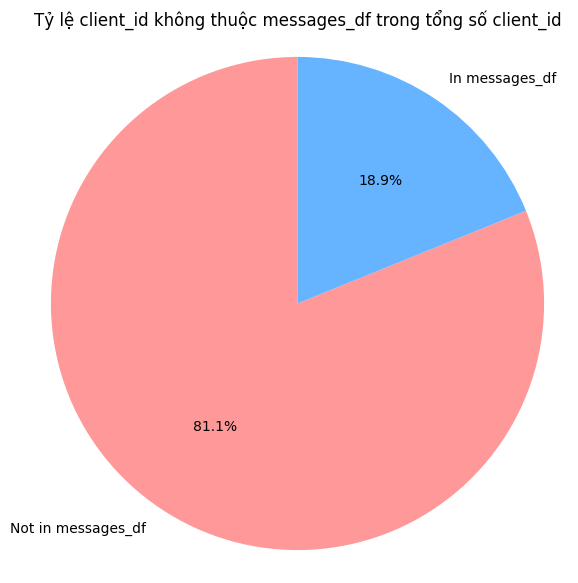

In [24]:
# Giả sử 'client_first_purchased' và 'messages_df' là các dataframe của bạn

# Bước 1: Lọc những khách hàng không có trong dữ liệu tin nhắn
filtered_clients = client_first_purchased[~client_first_purchased['client_id'].isin(messages_df['client_id'])]

# Bước 2: Tính tổng số khách hàng và số khách hàng không có trong tin nhắn
total_client_ids = len(client_first_purchased['client_id'].unique())  # Tổng số khách hàng trong dữ liệu mua hàng đầu tiên
filtered_client_ids = len(filtered_clients['client_id'].unique())  # Số khách hàng không có trong dữ liệu tin nhắn

# Bước 3: Tính tỷ lệ phần trăm khách hàng không có trong dữ liệu tin nhắn
percentage = (filtered_client_ids / total_client_ids) * 100

# In ra tỷ lệ phần trăm
print(f"Tỷ lệ client_id không có trong messages_df là: {percentage:.2f}%")

# Bước 4: Vẽ biểu đồ pie thể hiện tỷ lệ
labels = ['Not in messages_df', 'In messages_df']
sizes = [filtered_client_ids, total_client_ids - filtered_client_ids]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ client_id không thuộc messages_df trong tổng số client_id')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

- Tỷ lệ khách hàng không thuộc messages_df cao (81.1%) cho thấy nhiều khách hàng chưa được tiếp cận hoặc dữ liệu chưa được ghi nhận đầy đủ.
- Tỷ lệ trong messages_df thấp (18.9%) phản ánh việc sử dụng tin nhắn hạn chế hoặc tập trung vào nhóm khách hàng cụ thể.

Doanh nghiệp có cơ hội cải thiện chiến lược liên lạc để tiếp cận nhiều khách hàng hơn.

Cần đảm bảo hệ thống ghi nhận dữ liệu đầy đủ và chính xác để hỗ trợ phân tích và tối ưu hóa chiến lược.

In [25]:
# Hiển thị ngày mua đầu tiên nhỏ nhất trong dữ liệu
client_first_purchased['first_purchase_date'].min()

Timestamp('2021-12-15 00:00:00')

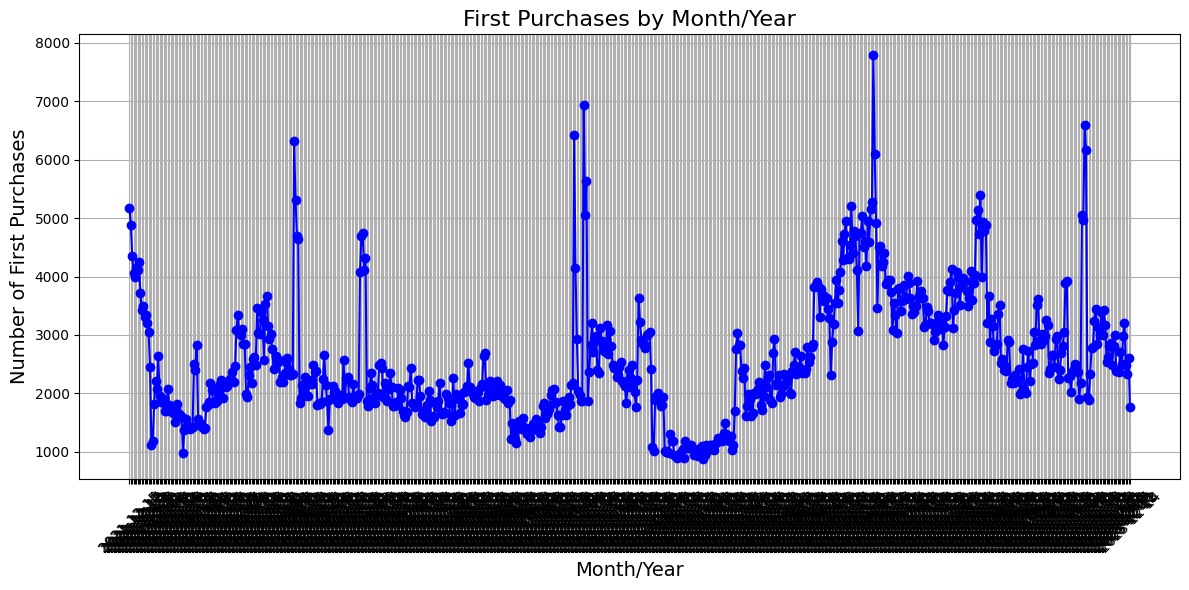

In [26]:
# Đảm bảo rằng 'first_purchase_date' đã được chuyển đổi thành kiểu datetime
client_first_purchased['year_month'] = client_first_purchased['first_purchase_date'].dt.to_period('M')
monthly_purchase_count = client_first_purchased.groupby('first_purchase_date').size()

# Vẽ biểu đồ đường thể hiện số lượng mua hàng theo tháng/năm
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase_count.index.astype(str), monthly_purchase_count.values, marker='o', linestyle='-', color='b')
plt.title('First Purchases by Month/Year', fontsize=16)
plt.xlabel('Month/Year', fontsize=14)
plt.ylabel('Number of First Purchases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Đỉnh cao (Peaks): Thể hiện hiệu quả của chiến lược marketing hoặc mùa cao điểm.
- Thấp điểm: Do giảm marketing, tính mùa vụ, hoặc yếu tố bên ngoài.

Phân tích các tháng cao điểm để tái áp dụng chiến lược thành công.

Tập trung khắc phục nguyên nhân ở các tháng thấp điểm.

In [27]:
# Tính toán thời gian giữa lần mở và lần click đầu tiên của mỗi tin nhắn
messages_df['duration'] = (messages_df['clicked_first_time_at'] - messages_df['opened_first_time_at']).dt.total_seconds()

# Tạo bảng tổng hợp dữ liệu theo client_id
user_summary_df = messages_df.groupby('client_id').agg({
    'is_opened': 'sum',
    'is_clicked': 'sum',
    'is_unsubscribed': 'sum',
    'is_complained': 'sum',
    'is_blocked': 'sum',
    'is_purchased': 'sum',
    'date': ['min', 'max'],  # Lấy ngày hoạt động đầu tiên và cuối cùng
    'purchased_at': 'count',  # Đếm số lần mua hàng
    'sent_at': 'count',  # Đếm số lần tin nhắn đã gửi
}).reset_index()

# Làm phẳng các tên cột sau khi thực hiện phép toán nhóm
user_summary_df.columns = ['_'.join(col).strip('_') for col in user_summary_df.columns]

# Tính toán số ngày tham gia từ lần hoạt động đầu tiên đến cuối cùng
user_summary_df['engagement_duration'] = (
    pd.to_datetime(user_summary_df['date_max']) - pd.to_datetime(user_summary_df['date_min'])
).dt.days

# Tính tỷ lệ mở tin nhắn
user_summary_df['open_rate'] = user_summary_df['is_opened_sum'] / (
    user_summary_df['sent_at_count'] + 1e-5
) * 100

# Tính tỷ lệ click vào tin nhắn
user_summary_df['click_rate'] = user_summary_df['is_clicked_sum'] / (
    user_summary_df['sent_at_count'] + 1e-5
) * 100

# Tính tỷ lệ complaint và unsubscribe
user_summary_df['unsubscribe_rate'] = user_summary_df['is_unsubscribed_sum'] / (
    user_summary_df['sent_at_count'] + 1e-5
) * 100

user_summary_df['complaint_rate'] = user_summary_df['is_complained_sum'] / (
    user_summary_df['sent_at_count'] + 1e-5
) * 100

user_summary_df['block_rate'] = user_summary_df['is_blocked_sum'] / (
    user_summary_df['sent_at_count'] + 1e-5
) * 100

# Tính toán tỷ lệ mua hàng từ lần mở tin và click vào tin
user_summary_df['purchase_rate'] = user_summary_df['is_purchased_sum'] / (
    user_summary_df['is_opened_sum'] + 1e-5
)

# Tính toán tỷ lệ mua hàng sau mỗi lần click và mở
user_summary_df['purchase_conversion_rate'] = user_summary_df['is_purchased_sum'] / (
    user_summary_df['is_opened_sum'] + 1e-5
)

Kiểm tra xem user có mua hàng trong data message có ghi nhận trong lần mua hàng không

Lọc ra các user đã có mua hàng và không nằm trong danh sách mua hàng lần đầu

In [28]:
user_summary_df_check_first_purchased = user_summary_df[
    (user_summary_df['is_purchased_sum'] > 0) & 
    (~user_summary_df['client_id'].isin(client_first_purchased['client_id']))
]
user_summary_df_check_first_purchased

,client_id,is_opened_sum,is_clicked_sum,is_unsubscribed_sum,is_complained_sum,is_blocked_sum,is_purchased_sum,date_min,date_max,purchased_at_count,sent_at_count,engagement_duration,open_rate,click_rate,unsubscribe_rate,complaint_rate,block_rate,purchase_rate,purchase_conversion_rate
200,1515915625468061823,5,3,0,0,0,1,2021-05-21,2021-06-12,1,5,22,99.999800,59.999880,0.0,0.0,0.0,0.200000,0.200000
380,1515915625468062834,9,6,0,0,0,2,2021-05-12,2021-06-14,2,19,33,47.368396,31.578931,0.0,0.0,0.0,0.222222,0.222222
469,1515915625468063280,5,2,0,0,0,1,2021-05-21,2021-06-11,1,12,21,41.666632,16.666653,0.0,0.0,0.0,0.200000,0.200000
1314,1515915625468067622,8,1,0,0,0,1,2021-05-02,2021-06-11,1,13,40,61.538414,7.692302,0.0,0.0,0.0,0.125000,0.125000
1404,1515915625468068072,8,2,0,0,0,1,2021-05-14,2021-06-10,1,19,27,42.105241,10.526310,0.0,0.0,0.0,0.125000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299463,1515915625646021858,8,2,0,0,0,1,2021-05-27,2021-06-09,1,8,13,99.999875,24.999969,0.0,0.0,0.0,0.125000,0.125000
3302947,1515915625646468628,8,4,0,0,0,1,2021-05-28,2021-06-10,1,17,13,47.058796,23.529398,0.0,0.0,0.0,0.125000,0.125000
3306291,1515915625647180256,21,10,0,0,0,2,2021-06-03,2021-06-11,2,21,8,99.999952,47.619025,0.0,0.0,0.0,0.095238,0.095238
3308028,1515915625647612216,11,4,0,0,0,1,2021-05-31,2021-06-08,1,11,8,99.999909,36.363603,0.0,0.0,0.0,0.090909,0.090909


Giải thích:
- Do bộ data messages không đầy đủ, số lượng record thì kéo dài từ ngày 30/4/2021 - 11/6/2021, và dữ liệu trong tập client first purchased cũng chỉ lưu trữ data từ 04/2021-12/2023 -> có thể client trong bộ data messages có lần mua đầu tiên rơi vào khoảng trước 04/2021
- tạm thời fill dữ liệu bằng cách lấy ngày đầu tiên khách hàng mua hàng trong bộ data messages là ngày đầu tiên mua hàng của user
- Và vì tính chất thời gian của first purchased -> sẽ có những khách hàng mua hàng ở tương lai -> thời điểm sau tháng 6/2021 -> chuyển về null

In [29]:
# Kết hợp dữ liệu mua hàng đầu tiên của khách hàng vào bảng tổng hợp
user_summary_df = user_summary_df.merge(client_first_purchased, how = 'left', on = 'client_id')

# Kiểm tra các điều kiện không hợp lệ cho khách hàng
condition1 = (user_summary_df['is_purchased_sum'] > 0) & user_summary_df['first_purchase_date'].isna()  # Mua nhưng không có ngày mua đầu tiên
condition2 = (user_summary_df['first_purchase_date'] > user_summary_df['date_max']) & \
             (user_summary_df['is_purchased_sum'] == 0)  # Ngày mua đầu tiên lớn hơn ngày hoạt động cuối cùng nhưng không mua hàng

user_summary_df['in_valid_customer'] = np.where(condition1 | condition2, 1, 0)  # Đánh dấu khách hàng không hợp lệ

in_valid_customer
0    2978026
1     345872
Name: count, dtype: int64


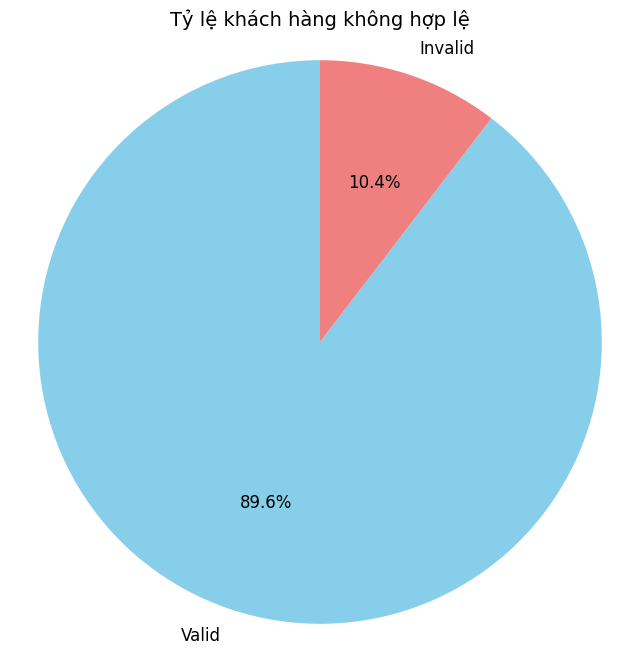

In [30]:
# Hiển thị phân bố tỷ lệ khách hàng hợp lệ và không hợp lệ
invalid_counts = user_summary_df['in_valid_customer'].value_counts()
labels = ['Valid', 'Invalid']
sizes = [invalid_counts.get(0, 0), invalid_counts.get(1, 0)]
colors = ['skyblue', 'lightcoral']

print(invalid_counts)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Tỷ lệ khách hàng không hợp lệ', fontsize=14)
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

- Khách hàng hợp lệ (89.6%): Phần lớn dữ liệu khách hàng là hợp lệ, cho thấy hệ thống quản lý hoạt động tốt.
- Khách hàng không hợp lệ (10.4%): Có thể do dữ liệu thiếu, không đủ tiêu chí, hoặc lỗi nhập liệu.

Duy trì chất lượng dữ liệu: Cần giảm tỷ lệ khách hàng không hợp lệ để nâng cao hiệu quả kinh doanh.

In [31]:
# Tính số ngày hoạt động cho mỗi khách hàng
max_active_day = pd.to_datetime(messages_df['sent_at']).max()  # Ngày hoạt động mới nhất

# Tính toán số ngày hoạt động từ ngày mới nhất đến ngày mở lần cuối cùng của từng khách hàng
user_summary_df['current_active_days'] = (
    max_active_day - pd.to_datetime(user_summary_df['date_max'])
).dt.days

# Lấy ngày gửi thông báo đầu tiên của mỗi khách hàng
user_first_notification_date = messages_df.groupby('client_id')['sent_at'].min().reset_index()
user_first_notification_date.rename(columns={'sent_at': 'first_notification_date'}, inplace=True)

# Gộp thông tin vào bảng tổng hợp người dùng
user_summary_df = user_summary_df.merge(user_first_notification_date, how='left', on='client_id')

print(user_summary_df.columns)  # Check columns in user_summary_df

# Kiểm tra nếu cột 'first_notification_date' tồn tại và tính toán 'first_purchased_till_get_messages'
if 'first_notification_date' in user_summary_df.columns:
    user_summary_df['first_purchased_till_get_messages'] = (
        pd.to_datetime(user_summary_df['first_purchase_date']) - 
        pd.to_datetime(user_summary_df['first_notification_date'])
    ).dt.days

# Hiển thị bảng dữ liệu cuối cùng
user_summary_df.head()

Index(['client_id', 'is_opened_sum', 'is_clicked_sum', 'is_unsubscribed_sum',
       'is_complained_sum', 'is_blocked_sum', 'is_purchased_sum', 'date_min',
       'date_max', 'purchased_at_count', 'sent_at_count',
       'engagement_duration', 'open_rate', 'click_rate', 'unsubscribe_rate',
       'complaint_rate', 'block_rate', 'purchase_rate',
       'purchase_conversion_rate', 'first_purchase_date', 'year_month',
       'in_valid_customer', 'current_active_days', 'first_notification_date'],
      dtype='object')


,client_id,is_opened_sum,is_clicked_sum,is_unsubscribed_sum,is_complained_sum,is_blocked_sum,is_purchased_sum,date_min,date_max,purchased_at_count,...,complaint_rate,block_rate,purchase_rate,purchase_conversion_rate,first_purchase_date,year_month,in_valid_customer,current_active_days,first_notification_date,first_purchased_till_get_messages
0,1515915625467997301,7,0,0,0,0,0,2021-04-30,2021-06-10,0,...,0.0,0.0,0.00000,0.00000,NaT,NaT,0,4,2021-04-30 09:00:18,NaN
1,1515915625468007234,0,0,0,0,0,0,2021-05-26,2021-05-26,0,...,0.0,0.0,0.00000,0.00000,2022-08-08,2022-08,1,19,2021-05-26 06:47:11,438.0
2,1515915625468060728,0,0,0,0,0,0,2021-05-21,2021-05-27,0,...,0.0,0.0,0.00000,0.00000,NaT,NaT,0,18,2021-05-21 07:48:38,NaN
3,1515915625468060730,17,6,0,0,0,3,2021-05-06,2021-06-11,3,...,0.0,0.0,0.17647,0.17647,2022-02-17,2022-02,0,3,2021-05-06 14:10:18,286.0
4,1515915625468060741,0,0,0,0,0,0,2021-06-04,2021-06-04,0,...,0.0,0.0,0.00000,0.00000,2022-04-26,2022-04,1,10,2021-06-04 08:32:06,325.0


## TRỰC QUAN HÓA (VISUALIZATION)

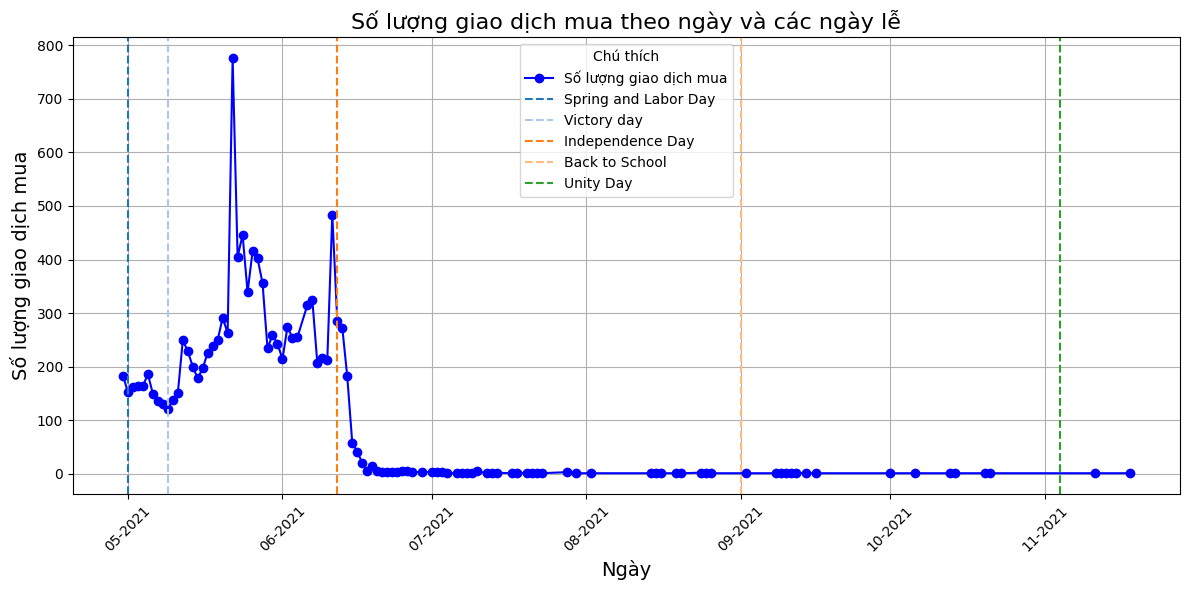

In [32]:
# Chuyển đổi cột 'purchased_at' thành định dạng ngày tháng
messages_df['purchased_at'] = pd.to_datetime(messages_df['purchased_at'])

# Lọc dữ liệu chỉ gồm những giao dịch đã được mua
messages_df_filter = messages_df[messages_df['is_purchased'] == True]

# Tính toán số lượng khách hàng duy nhất đã mua theo từng ngày
purchased_count = messages_df_filter.groupby(messages_df_filter['purchased_at'].dt.date)['client_id'].nunique()

# Chuyển đổi cột 'date' trong dữ liệu holidays thành định dạng ngày tháng
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

# Xác định ngày nhỏ nhất và ngày lớn nhất trong cột 'purchased_at' để tạo phạm vi ngày cho biểu đồ
min_date = messages_df['purchased_at'].min().date()
max_date = messages_df['purchased_at'].max().date()

# Lọc danh sách các ngày lễ trong phạm vi ngày từ min_date đến max_date
holidays_filtered = holidays_df[(holidays_df['date'].dt.date >= min_date) & (holidays_df['date'].dt.date <= max_date)]

# Tạo bảng ánh xạ giữa các ngày lễ và màu sắc
unique_holidays = holidays_filtered['holiday'].unique()
colors = plt.cm.tab20.colors  # Chọn bảng màu
holiday_color_map = {holiday: colors[i % len(colors)] for i, holiday in enumerate(unique_holidays)}

# Vẽ biểu đồ số lượng giao dịch mua theo ngày và đánh dấu các ngày lễ
plt.figure(figsize=(12, 6))

plt.plot(
    purchased_count.index, purchased_count.values,
    marker='o', linestyle='-', color='b', label='Số lượng giao dịch mua'
)

# Thêm các đường thẳng cho các ngày lễ
for _, row in holidays_filtered.iterrows():
    plt.axvline(
        x=row['date'].date(),
        color=holiday_color_map[row['holiday']],  # Màu sắc theo ngày lễ
        linestyle='--',
        label=row['holiday']
    )

plt.title('Số lượng giao dịch mua theo ngày và các ngày lễ', fontsize=16)
plt.xlabel('Ngày', fontsize=14)
plt.ylabel('Số lượng giao dịch mua', fontsize=14)
plt.grid(True)

# Cài đặt các mốc thời gian hiển thị theo tháng
monthly_ticks = pd.date_range(start=min_date, end=max_date, freq='MS')  # Đầu mỗi tháng
plt.xticks(monthly_ticks, labels=[tick.strftime('%m-%Y') for tick in monthly_ticks], rotation=45)

plt.tight_layout()

# Lọc trùng lặp trong chú thích của biểu đồ
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Chú thích', loc='best')

# Lưu và hiển thị biểu đồ
plt.savefig('line_chart.png', dpi=300)
plt.show()

- Tăng giao dịch vào các ngày lễ: Số lượng giao dịch tăng mạnh gần các ngày lễ lớn (Spring and Labor Day, Victory Day).
- Giảm giao dịch sau lễ: Sau các ngày lễ, số lượng giao dịch giảm rõ rệt.
- Chu kỳ theo mùa vụ: Dao động theo mùa, phản ánh chiến dịch tiếp thị hoặc nhu cầu khách hàng.

Chiến lược bán hàng: Tập trung marketing và khuyến mãi trước các ngày lễ lớn để tối đa hóa doanh số.

Quản lý hàng tồn kho: Chuẩn bị hàng hóa đầy đủ cho giai đoạn cao điểm.

Dự đoán doanh thu: Sử dụng dữ liệu để lập kế hoạch tài chính phù hợp.

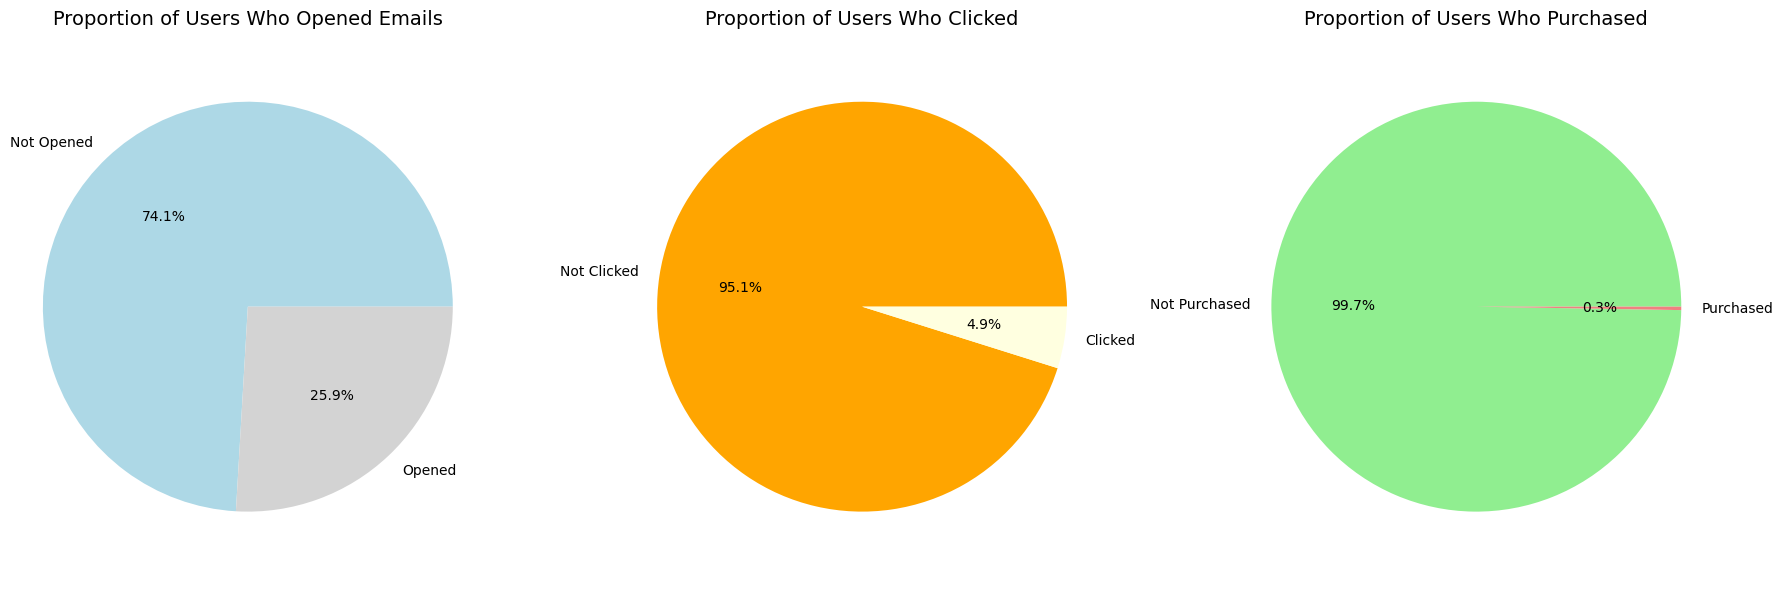

In [33]:
# Phân phối tỷ lệ người dùng đã mở, đã click và đã mua
purchase_distribution = user_summary_df['is_purchased_sum'].apply(lambda x: 'Purchased' if x > 0 else 'Not Purchased').value_counts()
open_distribution = user_summary_df['is_opened_sum'].apply(lambda x: 'Opened' if x > 0 else 'Not Opened').value_counts()
click_distribution = user_summary_df['is_clicked_sum'].apply(lambda x: 'Clicked' if x > 0 else 'Not Clicked').value_counts()

# Vẽ 3 biểu đồ hình tròn cho tỷ lệ người dùng đã mở, đã click và đã mua
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ phân phối người dùng đã mở email
axs[0].pie(open_distribution.values, labels=open_distribution.index, autopct='%1.01f%%', startangle=0, colors=['lightblue', 'lightgray'])
axs[0].set_title('Proportion of Users Who Opened Emails', fontsize=14)
axs[0].axis('equal')

# Biểu đồ phân phối người dùng đã click
axs[1].pie(click_distribution.values, labels=click_distribution.index, autopct='%1.01f%%', startangle=0, colors=['orange', 'lightyellow'])
axs[1].set_title('Proportion of Users Who Clicked', fontsize=14)
axs[1].axis('equal')

# Biểu đồ phân phối người dùng đã mua
axs[2].pie(purchase_distribution.values, labels=purchase_distribution.index, autopct='%1.01f%%', startangle=0, colors=['lightgreen', 'lightcoral'])
axs[2].set_title('Proportion of Users Who Purchased', fontsize=14)
axs[2].axis('equal')

# Tạo bố cục cho biểu đồ
plt.tight_layout()

# Lưu và hiển thị biểu đồ
plt.savefig('pie_charts_horizontal.png', dpi=300)
plt.show()

- Tỷ lệ mở email (25.9%): Ở mức trung bình, cần tối ưu tiêu đề và cá nhân hóa nội dung để tăng hiệu quả.
- Tỷ lệ nhấp chuột (4.9%): Thấp, cần cải thiện nội dung email và lời kêu gọi hành động (CTA) để thu hút người dùng hơn.
- Tỷ lệ mua hàng (0.3%): Rất thấp, cần tối ưu trang đích, trải nghiệm mua hàng, và cung cấp ưu đãi hấp dẫn.

Tăng mở email: Tiêu đề hấp dẫn, gửi đúng thời điểm, và cá nhân hóa nội dung.

Tăng nhấp chuột: CTA rõ ràng, email thiết kế trực quan, hấp dẫn.

Tăng mua hàng: Trang đích thân thiện, ưu đãi hấp dẫn, khuyến khích hành động tức thì.

In [34]:
# Tính toán và vẽ Box Plot của thời gian click không có outliers
Q1 = messages_df['duration'].quantile(0.25)
Q3 = messages_df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn ngoài của dữ liệu (outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu không có outliers
messages_df_duration = messages_df[(messages_df['duration'] >= lower_bound) & (messages_df['duration'] <= upper_bound)]

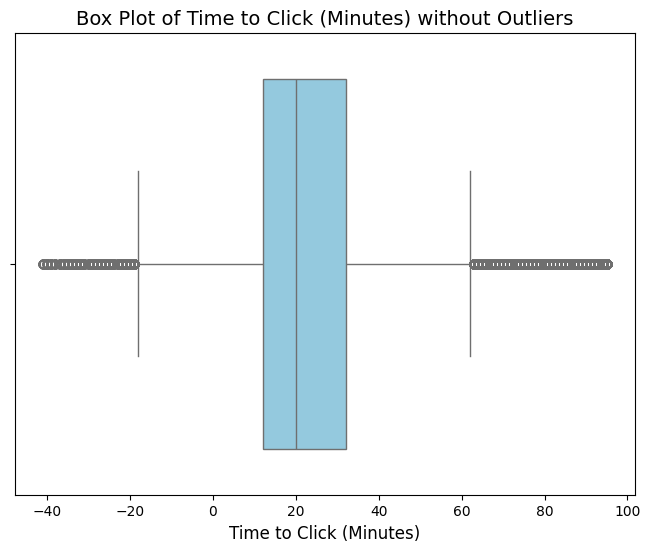

In [35]:
# Tính tỷ lệ các giá trị bị loại bỏ (outliers)
outliers_removed = len(messages_df) - len(messages_df_duration)
outlier_ratio = outliers_removed / len(messages_df) * 100

# Vẽ biểu đồ Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=messages_df_duration['duration'], color='skyblue')

plt.title('Box Plot of Time to Click (Minutes) without Outliers', fontsize=14)
plt.xlabel('Time to Click (Minutes)', fontsize=12)

plt.show()

Hộp (box): Biểu diễn khoảng giá trị từ Q1 (25%) đến Q3 (75%) với đường trung vị (median) thể hiện thời gian nhấp chuột phổ biến nhất.
Râu (whiskers): Biểu diễn phạm vi giá trị dữ liệu chính, loại trừ các giá trị ngoại lai.
Ngoại lai (outliers): Các giá trị nằm ngoài râu bị loại bỏ để tránh méo mó phân tích.

- Khoảng thời gian chính: Người dùng thường nhấp chuột trong khoảng từ Q1 đến Q3.
- Trung vị: Thời gian nhấp chuột phổ biến nhất nằm trong khoảng này.
- Đối xứng: Phân phối thời gian nhấp chuột tương đối cân đối.

Tối ưu hóa thời gian gửi email: Dựa trên trung vị và khoảng Q1/Q3, doanh nghiệp có thể chọn thời điểm gửi email phù hợp nhất để tăng tương tác.

Xử lý ngoại lai: Loại bỏ giá trị cực đoan giúp tập trung vào hành vi chính xác của người dùng.

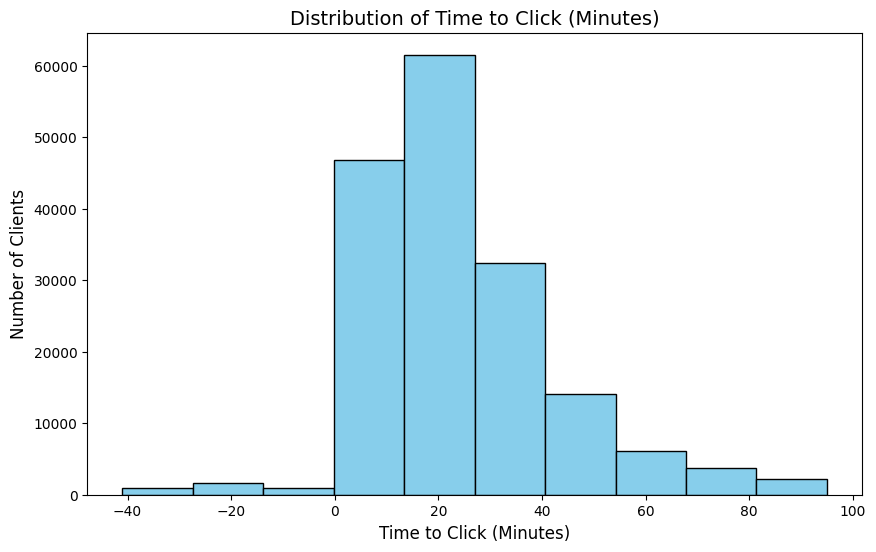

In [36]:
# Vẽ biểu đồ Histogram phân phối thời gian click (không có outliers)
plt.figure(figsize=(10, 6))
plt.hist(messages_df_duration['duration'], bins=10, edgecolor='black', color='skyblue')

plt.title('Distribution of Time to Click (Minutes)', fontsize=14)
plt.xlabel('Time to Click (Minutes)', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

plt.show()

- Phần lớn khách hàng nhấp chuột trong 10-30 phút, đỉnh cao tại khoảng 20 phút.
- Phân phối lệch phải, số lượng giảm mạnh sau 40 phút.

Hiểu hành vi: Thời gian phản hồi nhanh, phần lớn hành động xảy ra trong 30 phút đầu.

Tối ưu hóa chiến lược: Tập trung nội dung và CTA rõ ràng, hấp dẫn để khuyến khích hành động nhanh chóng.

Xử lý ngoại lệ: Kiểm tra các trường hợp nhấp chuột muộn hoặc giá trị âm để đảm bảo dữ liệu chính xác.

- < 0 là noise data -> giới hạn

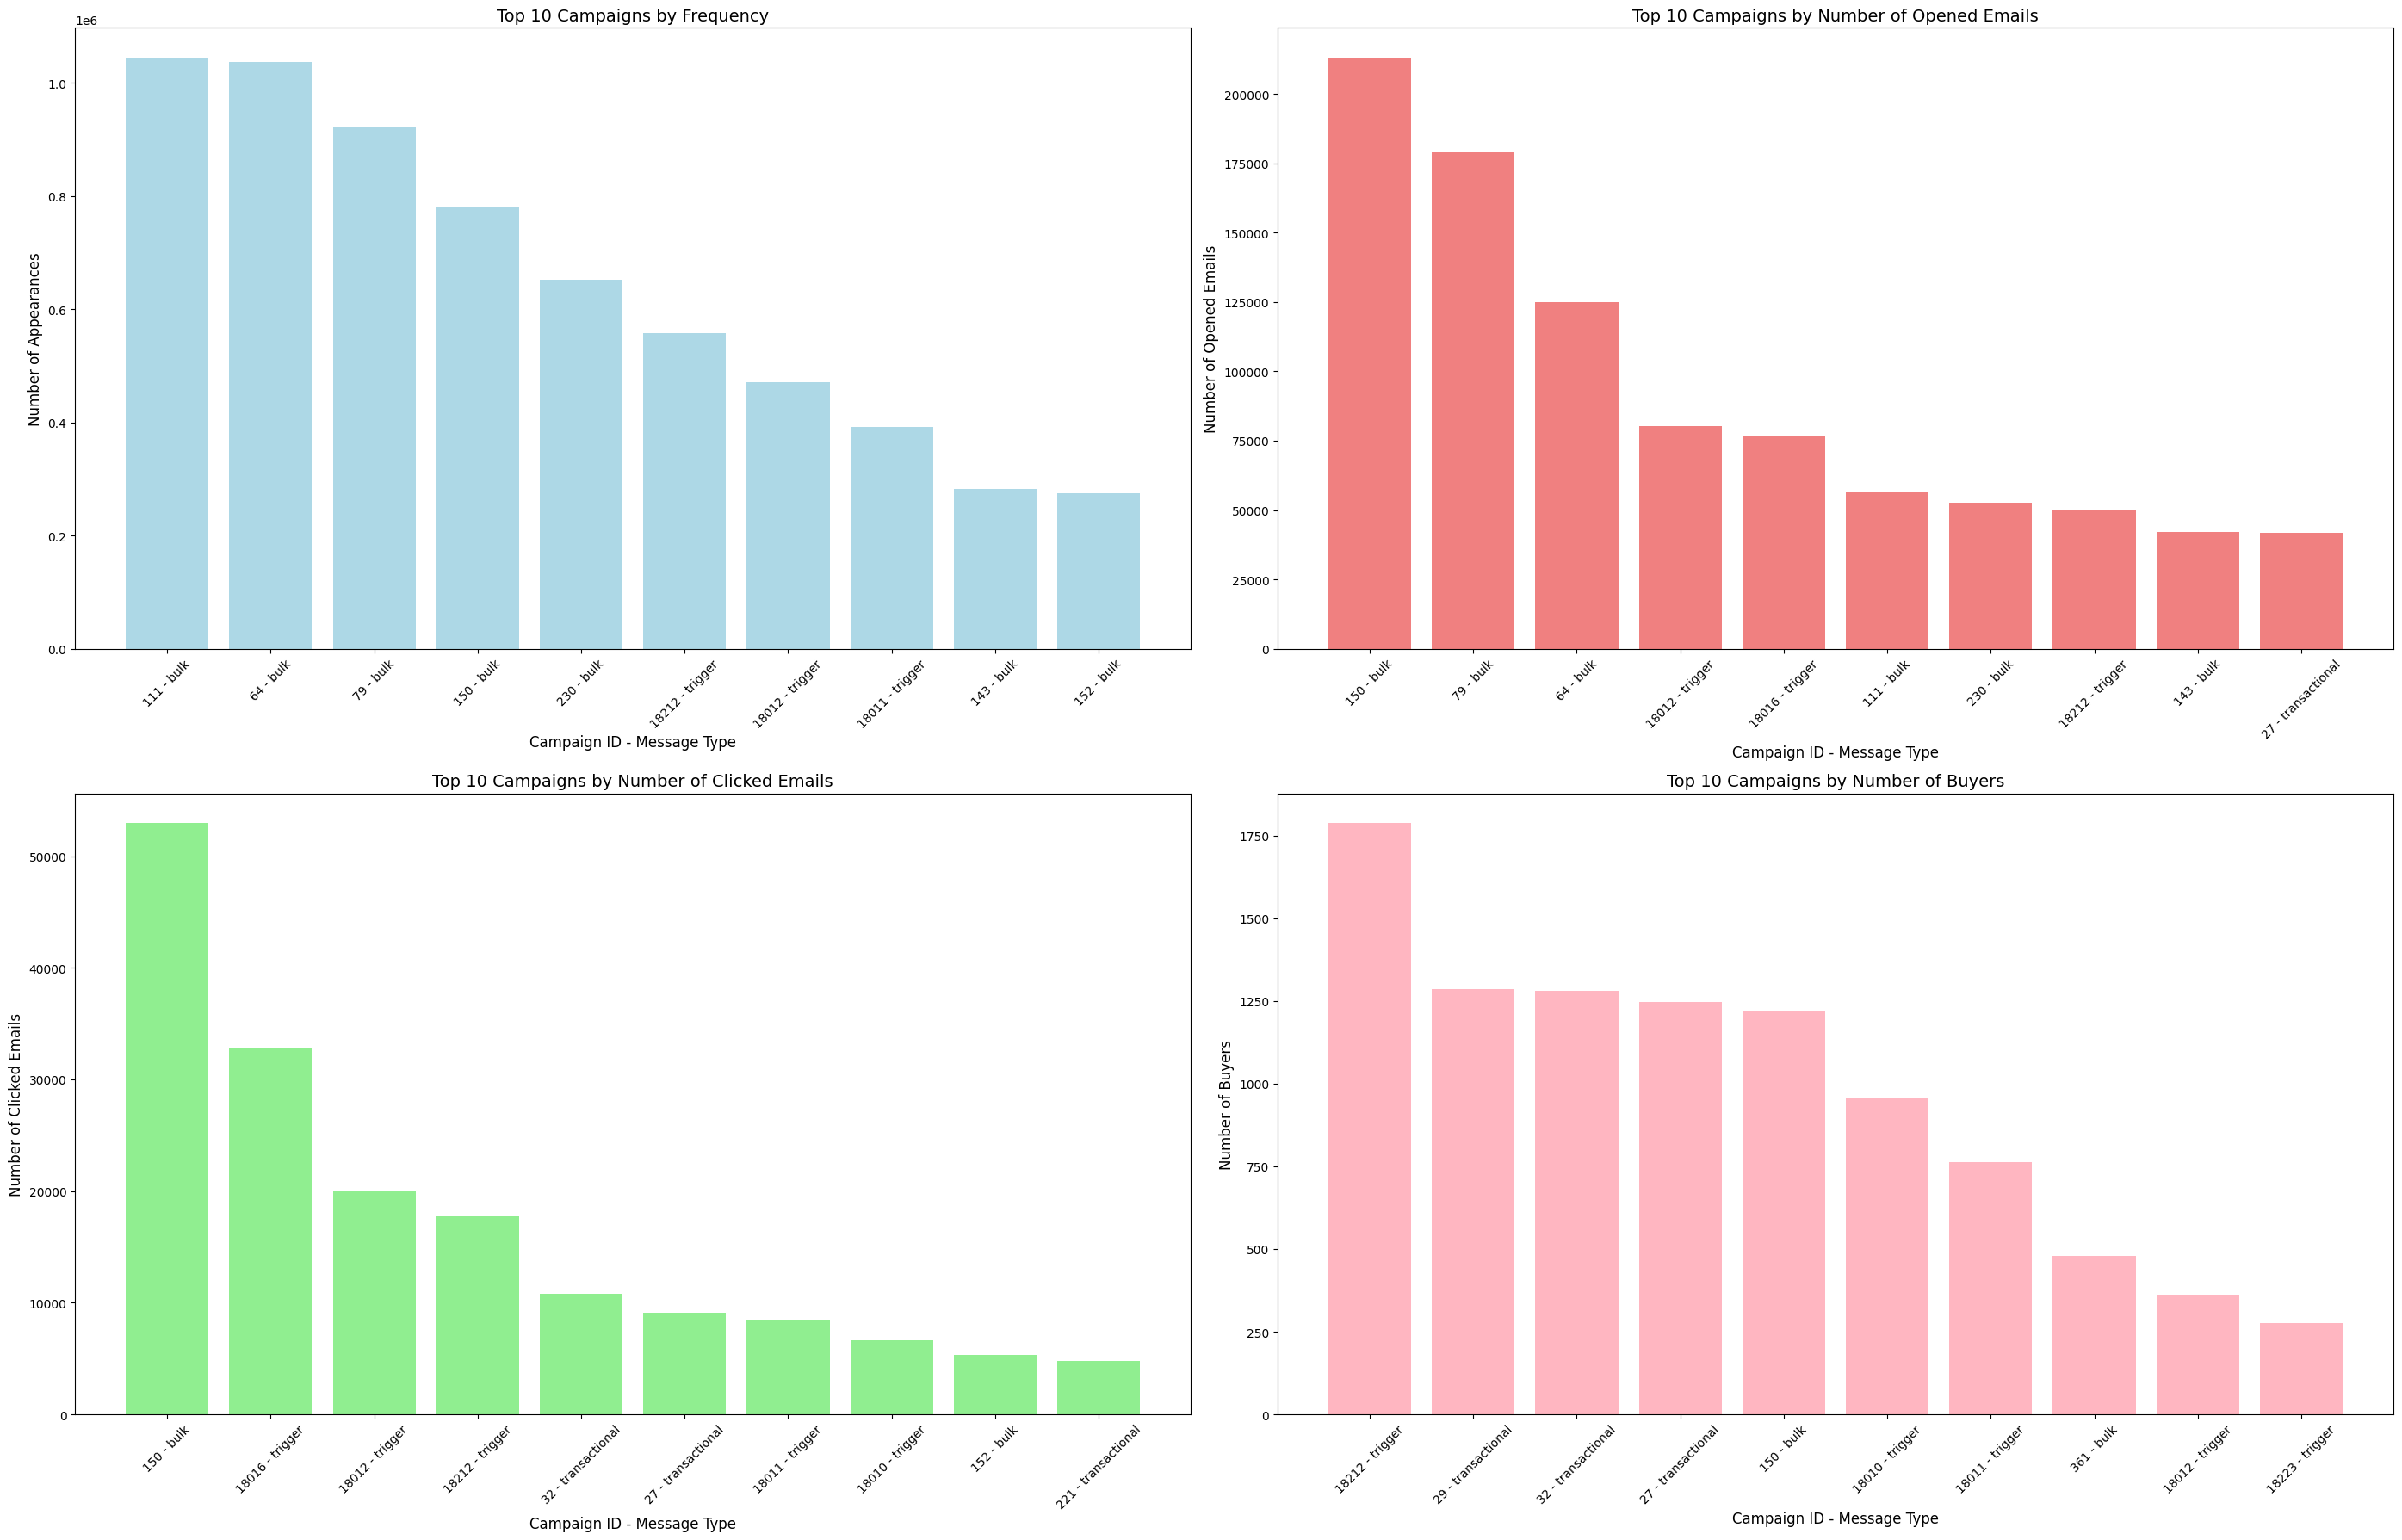

In [37]:
# Tạo cột 'campaign_message' kết hợp giữa 'campaign_id' và 'message_type'
messages_df['campaign_message'] = messages_df['campaign_id'].astype(str) + ' - ' + messages_df['message_type']

# Tính toán top 10 chiến dịch theo số lượng xuất hiện, số lượng mở, số lượng click và số lượng mua
top_campaigns_count = messages_df['campaign_message'].value_counts().head(10)
top_campaigns_purchase = messages_df[messages_df['is_purchased'] == 1].groupby('campaign_message')['client_id'].nunique().sort_values(ascending=False).head(10)
top_campaigns_opened = messages_df[messages_df['is_opened'] == 1].groupby('campaign_message')['client_id'].nunique().sort_values(ascending=False).head(10)
top_campaigns_click = messages_df[messages_df['is_clicked'] == 1].groupby('campaign_message')['client_id'].nunique().sort_values(ascending=False).head(10)

# Vẽ 4 biểu đồ Bar để so sánh top 10 chiến dịch theo các chỉ số
fig, axs = plt.subplots(2, 2, figsize=(28, 18))

# Biểu đồ top 10 chiến dịch theo số lần xuất hiện
axs[0, 0].bar(top_campaigns_count.index, top_campaigns_count.values, color='lightblue')
axs[0, 0].set_title('Top 10 Campaigns by Frequency', fontsize=14)
axs[0, 0].set_xlabel('Campaign ID - Message Type', fontsize=12)
axs[0, 0].set_ylabel('Number of Appearances', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=45)

# Biểu đồ top 10 chiến dịch theo số lần mở email
axs[0, 1].bar(top_campaigns_opened.index, top_campaigns_opened.values, color='lightcoral')
axs[0, 1].set_title('Top 10 Campaigns by Number of Opened Emails', fontsize=14)
axs[0, 1].set_xlabel('Campaign ID - Message Type', fontsize=12)
axs[0, 1].set_ylabel('Number of Opened Emails', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=45)

# Biểu đồ top 10 chiến dịch theo số lần click
axs[1, 0].bar(top_campaigns_click.index, top_campaigns_click.values, color='lightgreen')
axs[1, 0].set_title('Top 10 Campaigns by Number of Clicked Emails', fontsize=14)
axs[1, 0].set_xlabel('Campaign ID - Message Type', fontsize=12)
axs[1, 0].set_ylabel('Number of Clicked Emails', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=45)

# Biểu đồ top 10 chiến dịch theo số lượng người mua
axs[1, 1].bar(top_campaigns_purchase.index, top_campaigns_purchase.values, color='lightpink')
axs[1, 1].set_title('Top 10 Campaigns by Number of Buyers', fontsize=14)
axs[1, 1].set_xlabel('Campaign ID - Message Type', fontsize=12)
axs[1, 1].set_ylabel('Number of Buyers', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=45)

# Tạo bố cục cho biểu đồ
plt.tight_layout()
plt.show()

- Top 10 chiến dịch theo số lần xuất hiện:
Cho thấy các chiến dịch được gửi đi nhiều nhất, tập trung vào việc tiếp cận khách hàng.

- Top 10 chiến dịch theo số lượng mở email:
Các chiến dịch có số lần mở cao phản ánh hiệu quả của tiêu đề và nội dung email.

- Top 10 chiến dịch theo số lần nhấp chuột:
Nhấn mạnh những chiến dịch có CTA và nội dung hấp dẫn, thu hút hành động.

- Top 10 chiến dịch theo số lượng người mua:
Đánh giá các chiến dịch tạo ra doanh số cao nhất, phản ánh thành công thực sự của chiến dịch.

Số lần gửi không đồng nghĩa với hiệu quả (mở, nhấp chuột, hoặc mua hàng).

Lượt mở và nhấp chuột thường liên quan đến lượt mua hàng, nhưng không tuyệt đối.

Các chiến dịch thành công nhất cần được phân tích sâu hơn để áp dụng chiến lược tương tự.

### Những Khách Hàng Không Tiềm Năng - Rác

Đánh gía dựa trên tương tác trên cả khoảng thời gian là bằng 0

In [38]:
# Lọc nhóm khách hàng không mở email
user_summary_df_no_potential = user_summary_df[user_summary_df['is_opened_sum'] == 0]
user_summary_df_no_potential

,client_id,is_opened_sum,is_clicked_sum,is_unsubscribed_sum,is_complained_sum,is_blocked_sum,is_purchased_sum,date_min,date_max,purchased_at_count,...,complaint_rate,block_rate,purchase_rate,purchase_conversion_rate,first_purchase_date,year_month,in_valid_customer,current_active_days,first_notification_date,first_purchased_till_get_messages
1,1515915625468007234,0,0,0,0,0,0,2021-05-26,2021-05-26,0,...,0.0,0.0,0.0,0.0,2022-08-08,2022-08,1,19,2021-05-26 06:47:11,438.0
2,1515915625468060728,0,0,0,0,0,0,2021-05-21,2021-05-27,0,...,0.0,0.0,0.0,0.0,NaT,NaT,0,18,2021-05-21 07:48:38,NaN
4,1515915625468060741,0,0,0,0,0,0,2021-06-04,2021-06-04,0,...,0.0,0.0,0.0,0.0,2022-04-26,2022-04,1,10,2021-06-04 08:32:06,325.0
5,1515915625468060748,0,0,0,0,0,0,2021-05-14,2021-05-29,0,...,0.0,0.0,0.0,0.0,NaT,NaT,0,16,2021-05-14 17:52:55,NaN
9,1515915625468060777,0,0,0,0,0,0,2021-05-11,2021-05-11,0,...,0.0,0.0,0.0,0.0,2022-04-23,2022-04,1,34,2021-05-11 14:21:19,346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323892,1515915625651678686,0,0,0,0,0,0,2021-06-14,2021-06-14,0,...,0.0,0.0,0.0,0.0,2023-02-10,2023-02,1,0,2021-06-14 06:11:48,605.0
3323893,1515915625651714220,0,0,0,0,0,0,2021-06-13,2021-06-13,0,...,0.0,0.0,0.0,0.0,NaT,NaT,0,1,2021-06-13 20:27:47,NaN
3323895,1515915625651840072,0,0,0,0,0,0,2021-06-14,2021-06-14,0,...,0.0,0.0,0.0,0.0,NaT,NaT,0,0,2021-06-14 09:54:21,NaN
3323896,1515915625651929035,0,0,0,0,0,0,2021-06-14,2021-06-14,0,...,0.0,0.0,0.0,0.0,NaT,NaT,0,0,2021-06-14 15:01:15,NaN


Số lần gửi ít nhất là: 1
Số lần gửi nhiều nhất là: 187


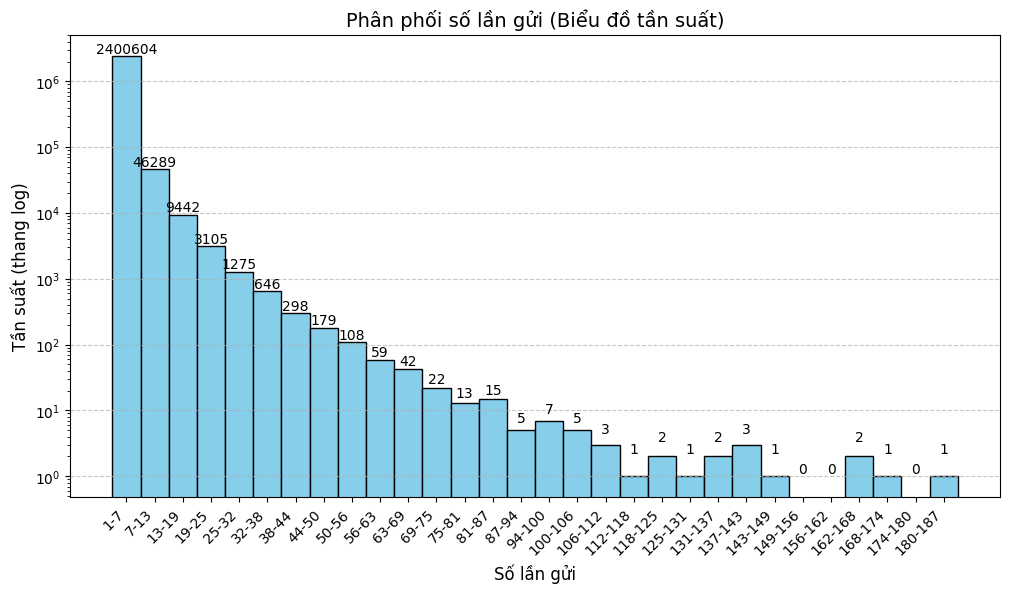

In [39]:
# In số lần gửi ít nhất và nhiều nhất trong nhóm khách hàng không mở email
print(f"Số lần gửi ít nhất là: {user_summary_df_no_potential['sent_at_count'].min()}")
print(f"Số lần gửi nhiều nhất là: {user_summary_df_no_potential['sent_at_count'].max()}")

# Vẽ Histogram phân phối số lần gửi email cho nhóm khách hàng không mở email với thang log
counts, bins = np.histogram(user_summary_df_no_potential['sent_at_count'], bins=30)

plt.figure(figsize=(12, 6))
plt.hist(user_summary_df_no_potential['sent_at_count'], bins=30, color='skyblue', edgecolor='black', log=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    plt.text(x, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(bin_centers, [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)], rotation=45, ha='right', fontsize=10)

plt.xlabel('Số lần gửi', fontsize=12)
plt.ylabel('Tần suất (thang log)', fontsize=12)
plt.title('Phân phối số lần gửi (Biểu đồ tần suất)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Phân phối số lần gửi email:
- Phần lớn khách hàng không mở email nhận ít email (1-7 lần: 2.4 triệu khách hàng).
- Số lượng khách hàng giảm mạnh khi số lần gửi tăng.
- Một số ít giá trị ngoại lai (ví dụ: > 100 lần gửi) có thể phản ánh lỗi hệ thống hoặc nhóm đặc biệt.

Dạng phân phối:
Lệch trái, tập trung ở nhóm có số lần gửi thấp.

Hiệu quả chiến dịch email: Gửi nhiều email không đảm bảo khách hàng sẽ mở, thậm chí có thể gây phiền hà.

Nhận diện khách hàng không tiềm năng: Nhóm khách hàng không mở email sau nhiều lần gửi nên được xem xét loại bỏ để tiết kiệm tài nguyên.

Tối ưu hóa chiến lược: Điều chỉnh nội dung, giảm tần suất gửi, và cá nhân hóa email cho nhóm không phản hồi.

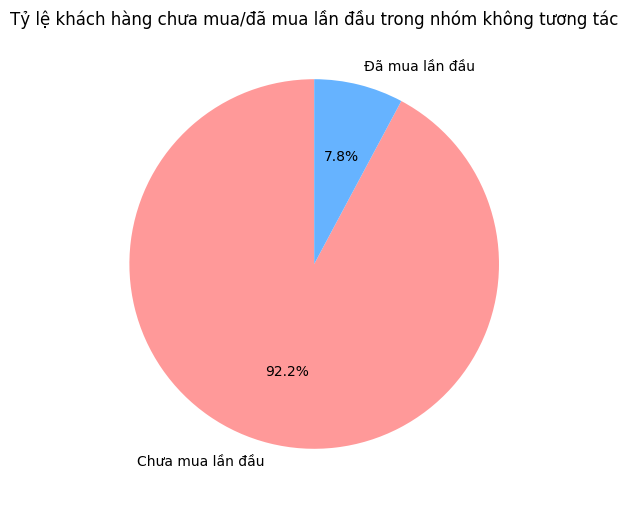

In [40]:
# Kiểm tra tỷ lệ khách hàng chưa mua lần đầu trong nhóm không tương tác
missing_values_client = user_summary_df_no_potential['first_purchase_date'].isna().sum()

# Vẽ biểu đồ pie cho tỷ lệ chưa mua lần đầu và đã mua lần đầu trong nhóm không tương tác
plt.figure(figsize=(6, 6))
plt.pie(
    [missing_values_client, len(user_summary_df_no_potential) - missing_values_client],
    labels=['Chưa mua lần đầu', 'Đã mua lần đầu'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title("Tỷ lệ khách hàng chưa mua/đã mua lần đầu trong nhóm không tương tác")
plt.show()

- Nhóm chưa mua lần đầu:
Tập trung chiến lược chuyển đổi, như gửi ưu đãi độc quyền, cá nhân hóa nội dung, hoặc khuyến khích hành động thông qua các chương trình khuyến mãi.

- Nhóm đã mua lần đầu:
Tìm hiểu lý do ngừng tương tác, khảo sát phản hồi, hoặc giới thiệu sản phẩm/dịch vụ liên quan để tăng giá trị vòng đời khách hàng.

Nhóm chưa mua lần đầu:
Tập trung chiến lược chuyển đổi, như gửi ưu đãi độc quyền, cá nhân hóa nội dung, hoặc khuyến khích hành động thông qua các chương trình khuyến mãi.

Nhóm đã mua lần đầu:
Tìm hiểu lý do ngừng tương tác, khảo sát phản hồi, hoặc giới thiệu sản phẩm/dịch vụ liên quan để tăng giá trị vòng đời khách hàng.

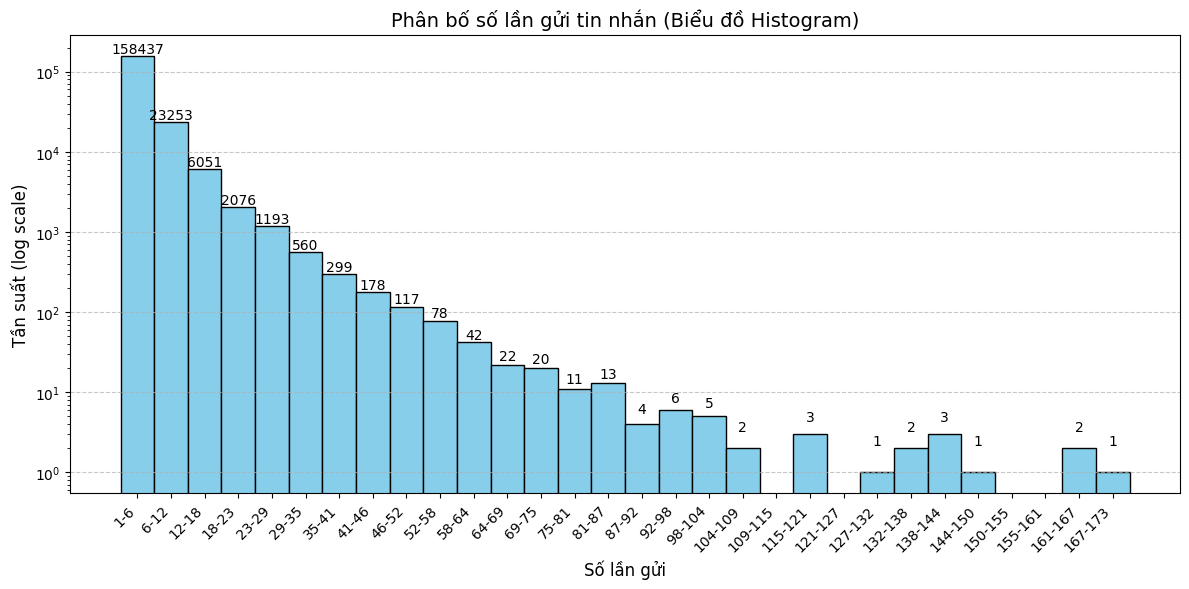

In [41]:
# Lọc khách hàng trong nhóm không tương tác đã mua lần đầu
filtered_data = user_summary_df_no_potential[user_summary_df_no_potential['first_purchase_date'].notna()]

# Vẽ Histogram phân phối số lần gửi email cho nhóm đã mua lần đầu với thang log
counts, bins = np.histogram(filtered_data['sent_at_count'], bins=30)

plt.figure(figsize=(12, 6))
plt.hist(filtered_data['sent_at_count'], bins=30, color='skyblue', edgecolor='black', log=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    if count != 0:
        plt.text(x, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(bin_centers, [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)], rotation=45, ha='right', fontsize=10)

plt.xlabel('Số lần gửi', fontsize=12)
plt.ylabel('Tần suất (log scale)', fontsize=12)
plt.title('Phân bố số lần gửi tin nhắn (Biểu đồ Histogram)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Phân phối số lần gửi tin nhắn:
- Nhóm nhận ít tin nhắn (1-6 lần): Chiếm phần lớn (158,437 khách hàng), cho thấy nhiều khách hàng có thể mua ngay từ các lần gửi đầu tiên.
- Nhóm nhận nhiều tin nhắn (> 50 lần): Rất ít khách hàng, có thể do lỗi hệ thống hoặc không hiệu quả trong chuyển đổi.

Dạng phân phối:
Lệch trái, tập trung ở nhóm số lần gửi thấp.

Hiệu quả chiến dịch: Gửi ít tin nhắn hiệu quả hơn trong việc thúc đẩy mua hàng so với gửi quá nhiều tin nhắn.

Tài nguyên: Gửi nhiều tin nhắn đến nhóm không phản hồi gây lãng phí tài nguyên.

Nhóm khách hàng nhiều tin nhắn: Cần phân tích kỹ để xác định tiềm năng hoặc loại bỏ khỏi danh sách gửi.

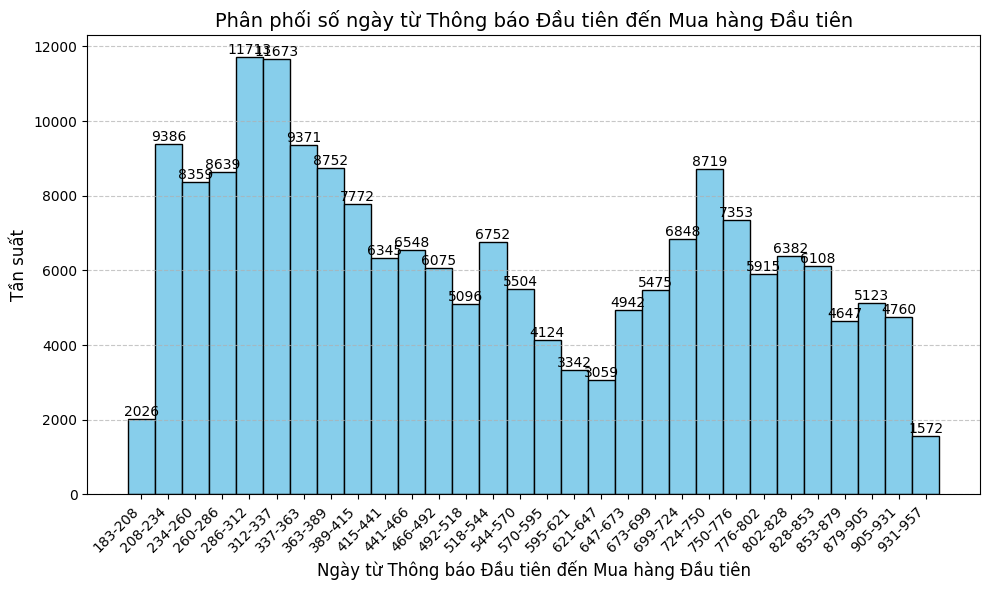

In [42]:
# Vẽ biểu đồ phân phối số ngày từ thông báo đầu tiên đến mua hàng đầu tiên cho nhóm chưa mua lần đầu
plt.figure(figsize=(10, 6))

counts, bins, patches = plt.hist(user_summary_df_no_potential['first_purchased_till_get_messages'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Ngày từ Thông báo Đầu tiên đến Mua hàng Đầu tiên', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.title('Phân phối số ngày từ Thông báo Đầu tiên đến Mua hàng Đầu tiên', fontsize=14)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    if count != 0:
        plt.text(x, count + 1, str(int(count)), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(bin_centers, [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Phân phối thời gian từ thông báo đến mua hàng:
- Đỉnh cao nhất: 366-391 ngày (~1 năm), với 11,713 khách hàng, cho thấy phần lớn khách hàng mua hàng lần đầu sau 1 năm kể từ thông báo đầu tiên.
- Giảm dần: Số lượng khách hàng giảm rõ rệt sau 750 ngày.

Thời gian chuyển đổi dài: Mất khoảng 1 năm để chuyển đổi phần lớn khách hàng, đòi hỏi chiến lược tiếp cận kiên nhẫn và dài hạn.

Chiến lược chu kỳ: Tập trung vào các giai đoạn cao điểm (6 tháng - 1 năm) để tăng cường hiệu quả tiếp thị.

Cơ hội tối ưu hóa nhóm chậm chuyển đổi: Nhóm khách hàng chậm mua hàng (>750 ngày) cần chiến lược riêng để đẩy nhanh quá trình mua.

Kết luận:
- Do bộ dữ liệu bị giới hạn vì vậy chỉ lưu trữ trên một mốc thời gian nhất định, do đó những khách hàng không tương tác và thời gian mua hàng lần đầu tiên cũng đã quá lâu ( >200ngày) -> không đủ dữ kiện để xác định là kháhc hàng này như thế nào
- Đối với những khách hàng không có tương tác trong giai đoạn từ tháng 4/2021 đến tháng 6/2021 và có lần mua hàng đầu tiên sau năm 2021, chúng ta không có đủ dữ liệu để xác định chính xác đặc điểm của họ.

# Những Khách Hàng Có Tương Tác - (Click + Open)

In [43]:
# Lọc nhóm người dùng đã mở và đã click để phân tích tiềm năng
user_potential_based_on_messages = messages_df[(messages_df['is_opened'] == True) & (messages_df['is_clicked'] == True)]
user_potential_based_on_messages

,campaign_id,message_type,client_id,channel,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,...,is_unsubscribed,unsubscribed_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,duration,campaign_message
message_id,,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,2021-04-30,2021-04-30 11:27:43,True,2021-05-04 05:47:05,2021-05-04 05:47:05,True,...,False,NaT,False,NaT,False,NaT,True,2021-05-06 16:40:38,41.0,31 - transactional
8788be73-7f89-4782-b970-e894bb521cbf,32,transactional,1515915625468084623,email,2021-04-30,2021-04-30 07:21:39,True,2021-05-04 11:41:53,2021-05-04 11:41:53,True,...,False,NaT,False,NaT,False,NaT,False,NaT,58.0,32 - transactional
b30564d6-6068-40fb-99e3-7fdeb61b7dc3,32,transactional,1515915625563510997,email,2021-04-30,2021-04-30 06:39:57,True,2021-04-30 20:23:16,2021-04-30 20:23:16,True,...,False,NaT,False,NaT,False,NaT,False,NaT,342499.0,32 - transactional
ed74ef8b-0620-40b1-92d0-279282098682,32,transactional,1515915625471679679,email,2021-04-30,2021-04-30 12:34:21,True,2021-05-04 16:00:28,2021-05-04 16:00:28,True,...,False,NaT,False,NaT,False,NaT,True,2021-05-04 16:04:26,14.0,32 - transactional
16db49b0-2280-4de0-825b-75f285d97065,179,transactional,1515915625491136518,email,2021-04-30,2021-04-30 08:04:31,True,2021-05-04 03:43:28,2021-05-04 03:43:28,True,...,False,NaT,False,NaT,False,NaT,False,NaT,22.0,179 - transactional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12f4b108-cf9e-4d78-86ac-9d18313a270c,18212,trigger,1515915625473195863,email,2021-06-14,2021-06-14 14:00:24,True,2021-06-14 14:59:45,2021-06-14 14:59:45,True,...,False,NaT,False,NaT,False,NaT,False,NaT,9.0,18212 - trigger
0efb08d2-f7e6-4cee-b877-60ee5d1c27fb,18011,trigger,1515915625473241161,email,2021-06-14,2021-06-14 10:30:36,True,2021-06-14 16:29:50,2021-06-14 16:29:50,True,...,False,NaT,False,NaT,False,NaT,False,NaT,5.0,18011 - trigger
c4836951-ae4f-4b24-b16d-6bd33412b41c,18010,trigger,1515915625473368163,email,2021-06-14,2021-06-14 17:20:25,True,2021-06-15 14:09:37,2021-06-15 14:09:37,True,...,False,NaT,False,NaT,False,NaT,False,NaT,5.0,18010 - trigger


# Chia Khách Hàng Thành 2 Phân Khúc: Khách Hàng Có Tương Tác Nhưng Không Mua và Khách Hàng Có Tương Tác và Có Mua

In [44]:
# Tạo hai nhóm: đã mua và chưa mua trong nhóm tiềm năng dựa trên việc đã click và mở
user_potential_based_on_messages_purchased = user_potential_based_on_messages[user_potential_based_on_messages['is_purchased'] == True ].drop_duplicates(subset='client_id', keep='first')
user_potential_based_on_messages_not_purchased = user_potential_based_on_messages[user_potential_based_on_messages['is_purchased'] == False].drop_duplicates(subset='client_id', keep='first')

In [45]:
# Lưu kết quả vào file CSV
user_potential_based_on_messages_purchased.to_csv('message_gold_label_2.csv')

In [46]:
user_potential_based_on_messages_not_purchased.to_csv('potential_3.csv')